# **forward_activation_distr_ploter** example

In [1]:
import torch
import torch.nn as nn
from forward_activation_distr_ploter import plot_dist

Make a simple NN

**Note we are making a list of each layers output**

In [2]:
# def a simple nn
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.l1 = nn.Linear(10, 5)
        self.l2 = nn.Linear(5, 3)
        self.l3 = nn.Linear(3, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        res = []
        x = self.l1(x)
        res.append(x)
        x = self.relu(x)
        res.append(x)
        x = self.l2(x)
        res.append(x)
        x = self.relu(x)
        res.append(x)
        x = self.l3(x)
        res.append(x)
        return x, res

Layer 1 output shape: torch.Size([100, 5])


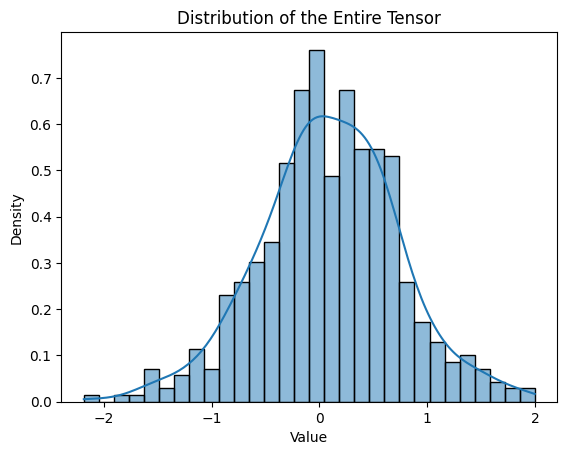

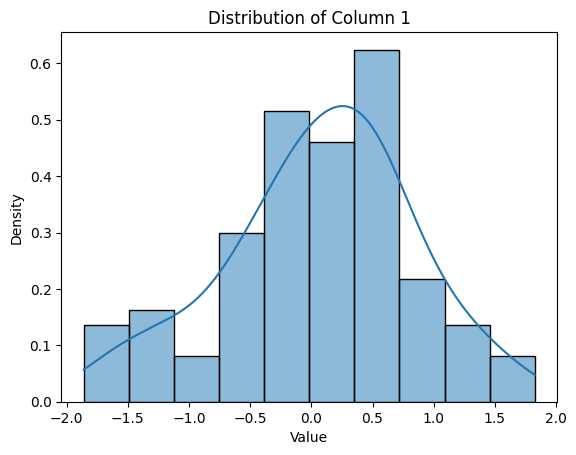

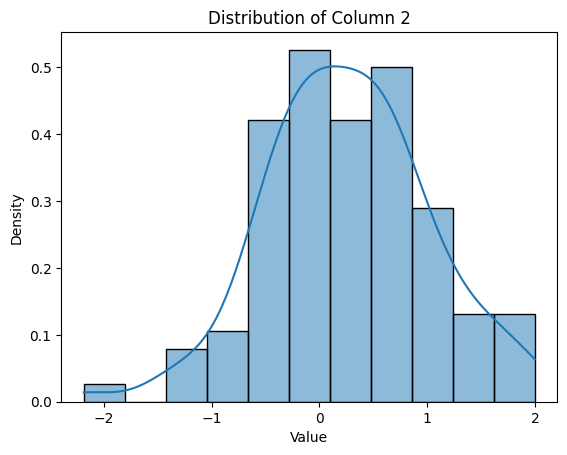

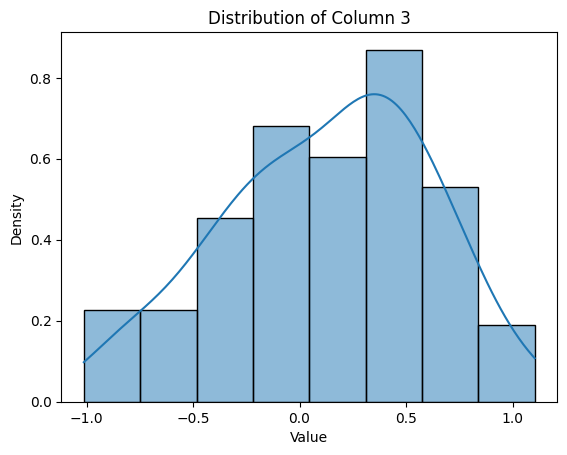

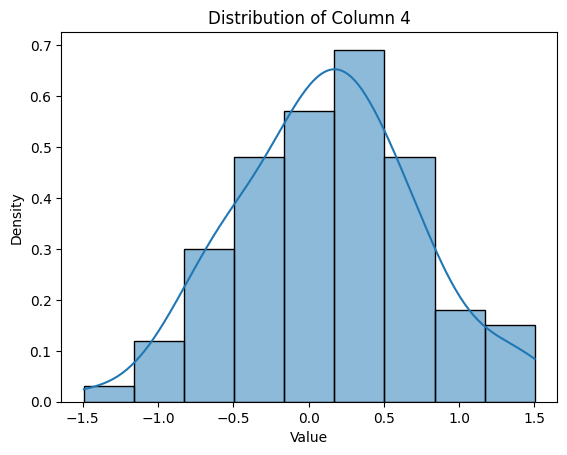

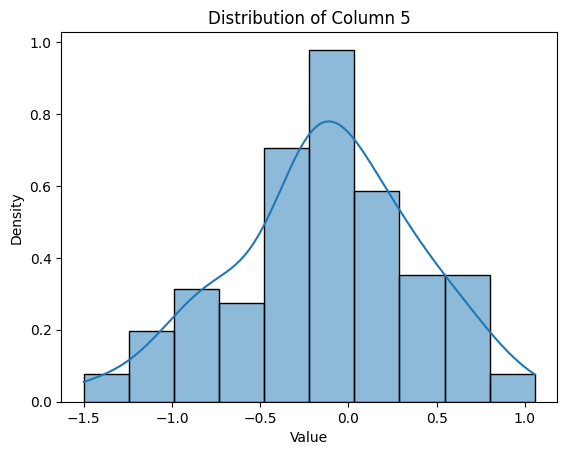

Layer 2 output shape: torch.Size([100, 5])


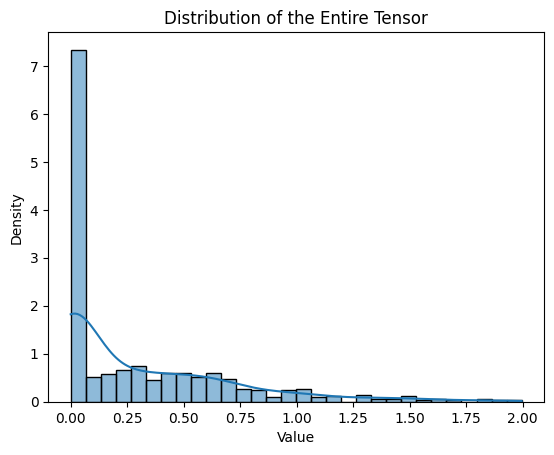

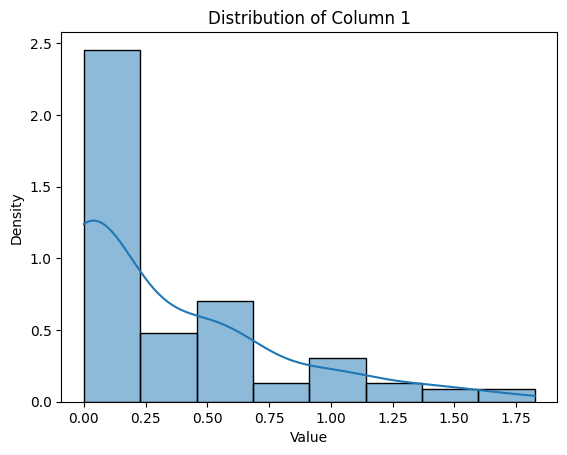

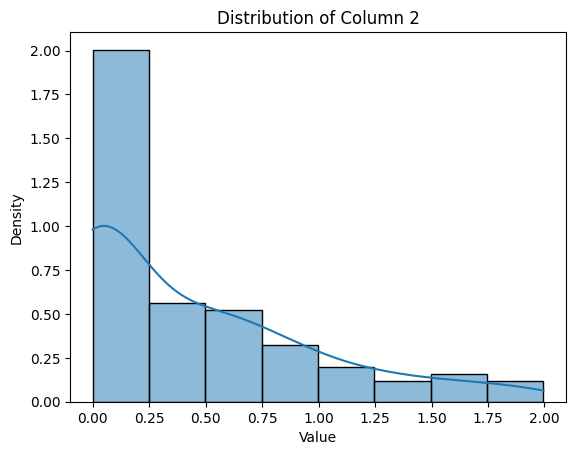

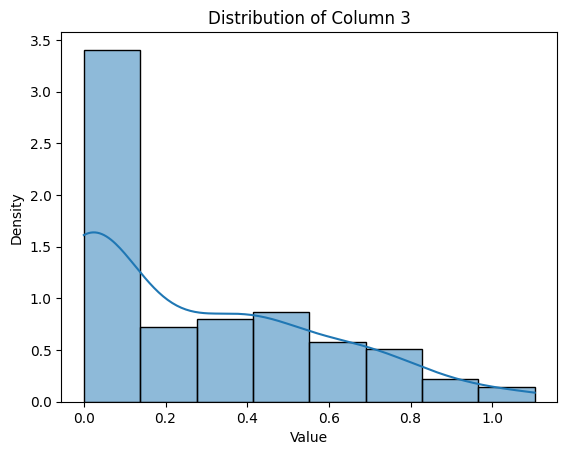

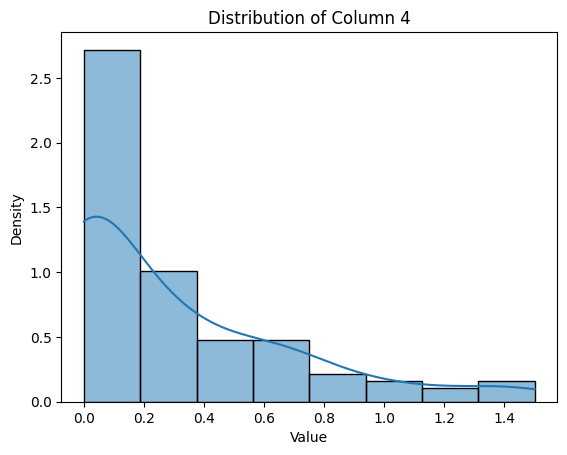

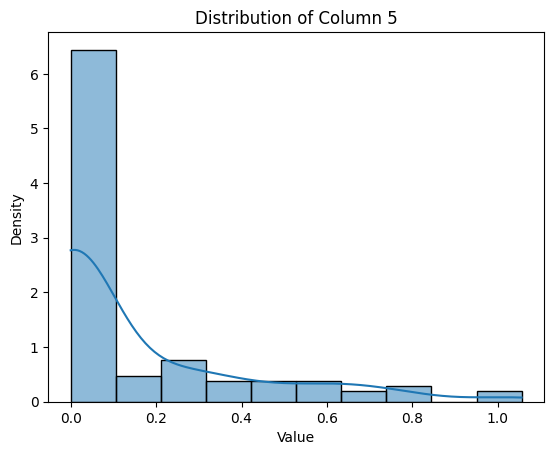

Layer 3 output shape: torch.Size([100, 3])


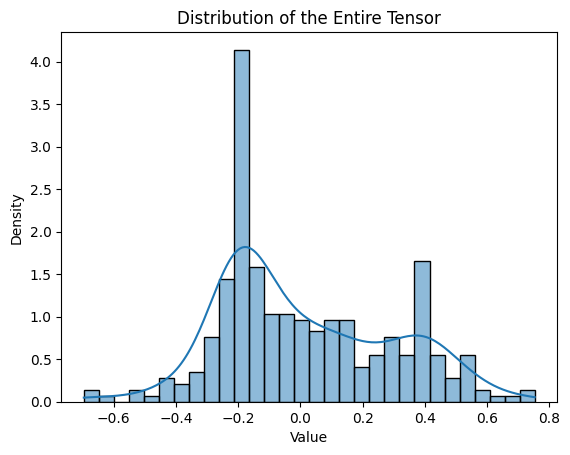

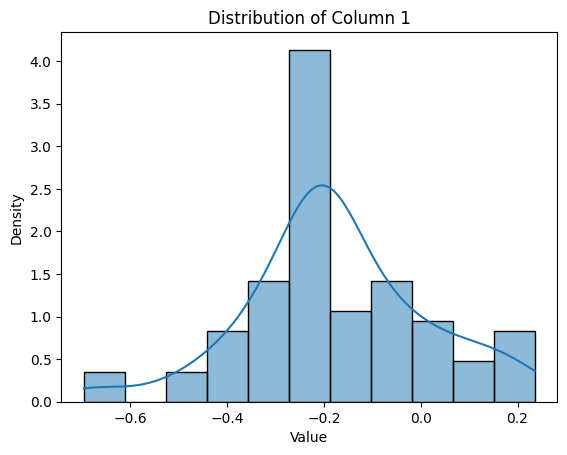

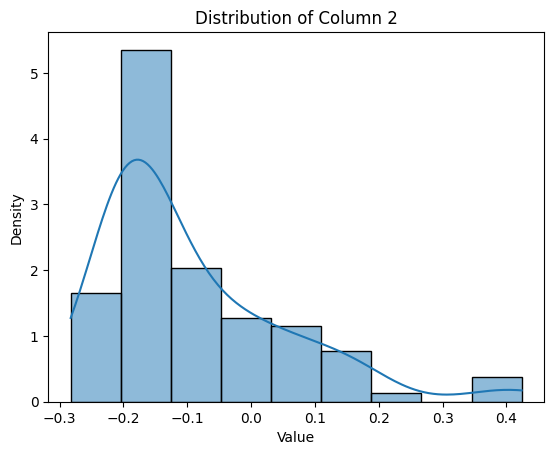

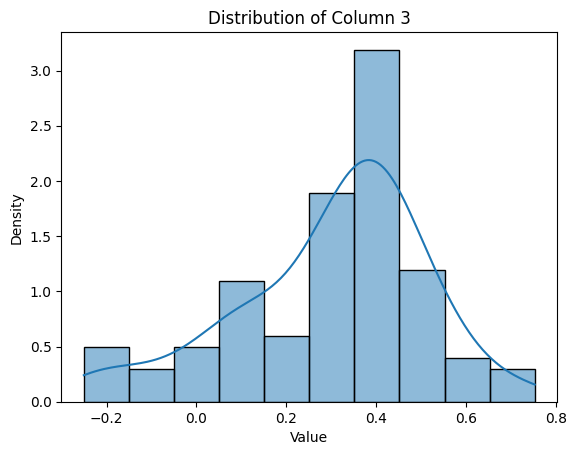

Layer 4 output shape: torch.Size([100, 3])


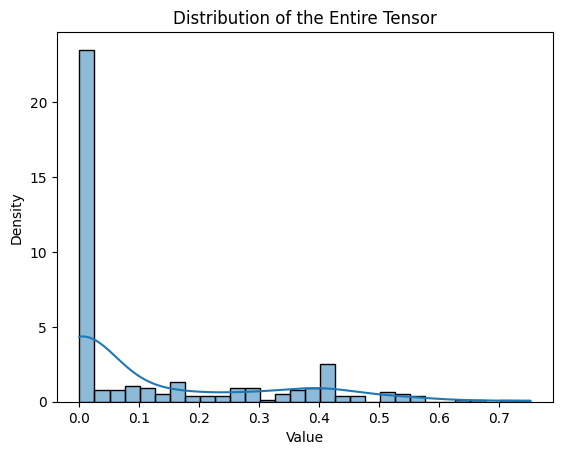

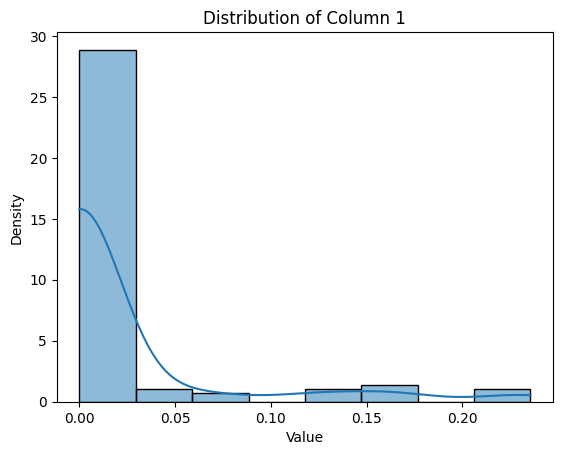

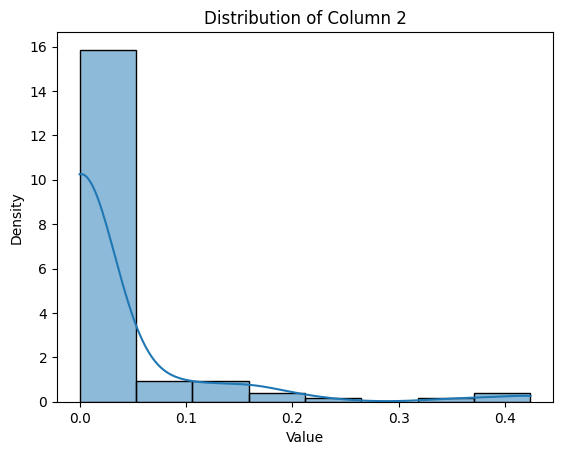

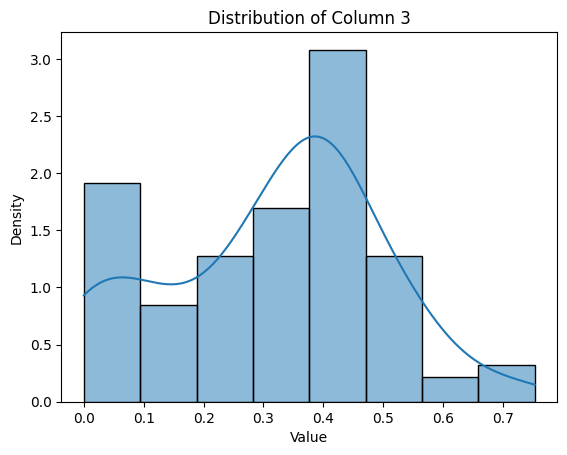

Layer 5 output shape: torch.Size([100, 2])


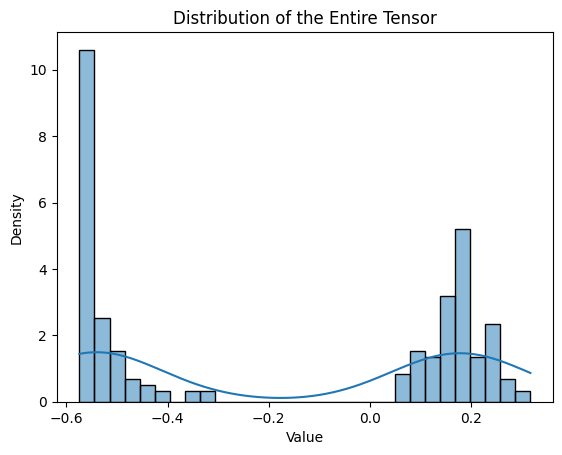

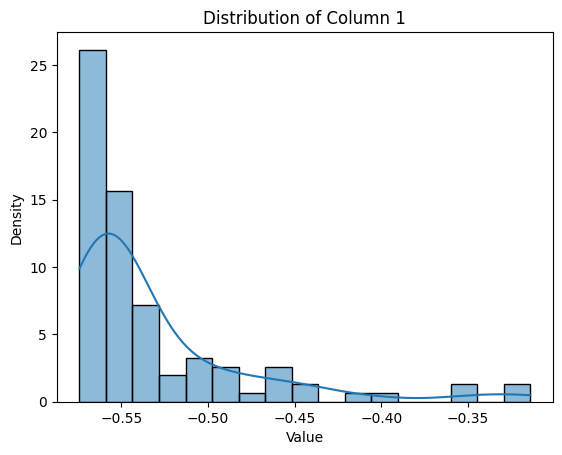

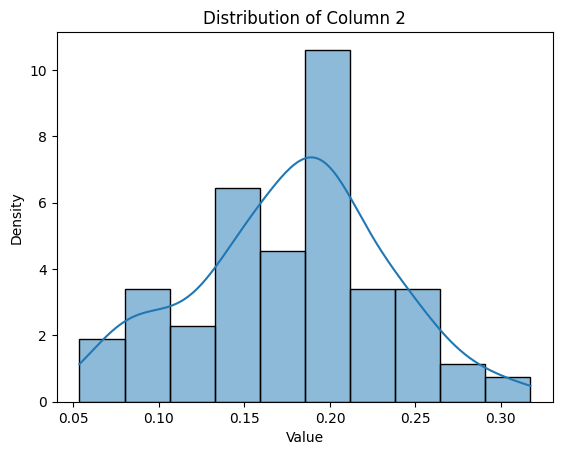

Final output shape: torch.Size([100, 2])


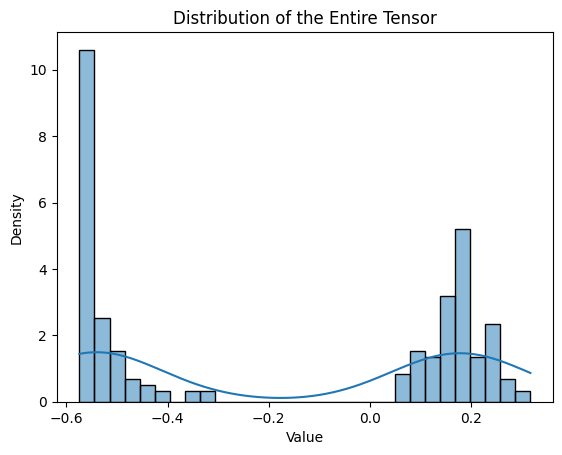

In [3]:
model = SimpleNN()

#rand input data
input_data = torch.randn(100, 10)

# forward pass
output, intermediate_results = model(input_data)

# plot the distributions 
for i, layer_output in enumerate(intermediate_results):
    print(f"Layer {i+1} output shape: {layer_output.shape}")
    
    # plot distribution of the entire layer output
    plot_dist(layer_output, dist_plot=1, figsize=(10, 6))
    
    # Plot distributions of the first 5 columns (or fewer if there are less than 5)
    num_cols = min(5, layer_output.shape[1])
    plot_dist(layer_output, dist_plot=0, num_cols=num_cols, figsize=(15, 3*num_cols))

# Plot distribution of the final output
print(f"Final output shape: {output.shape}")
plot_dist(output, dist_plot=1, figsize=(10, 6))